In [4]:
import cv2
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothicCoding')

from outDetection import outDetector#############################

In [9]:
def read_img(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img


def plot_two(shape, imgs, title=None):
    fig, axes = plt.subplots(*shape, figsize=(20, 8))
    for i, img in enumerate(imgs):
        axes[i].imshow(img, 'gray')
        if title:
            axes[i].set_title(title.split('&')[i], size=20, weight='semibold')
        axes[i]
    plt.tight_layout()
    plt.show()


def plot_diff(path1, path2, bboxes, shape=(1,2)):
    img1 = read_img(path1)
    img2 = read_img(path2)
    
    detector = outDetector()###############################

    preds = detector.predict(img1, bboxes)
    
    for bbox, pred in zip(bboxes, preds):
        (x, y, w, h) = bbox
        cv2.rectangle(img1, (x, y), (x + w, y + h), (0, 0, 255), 10)
        cv2.rectangle(img2, (x, y), (x + w, y + h), (0, 0, 255), 10)
        cv2.putText(img1, str(pred), (x+w//5, y+h//5), cv2.FONT_HERSHEY_SIMPLEX, 3,  (0, 0, 255), 10, cv2.LINE_AA, True)
        cv2.putText(img2, str(pred), (x+w//5, y+h//5), cv2.FONT_HERSHEY_SIMPLEX, 3,  (0, 0, 255), 10, cv2.LINE_AA, True)

    plot_two(shape, [img1, img2], title=f'{path1} & {path2}')


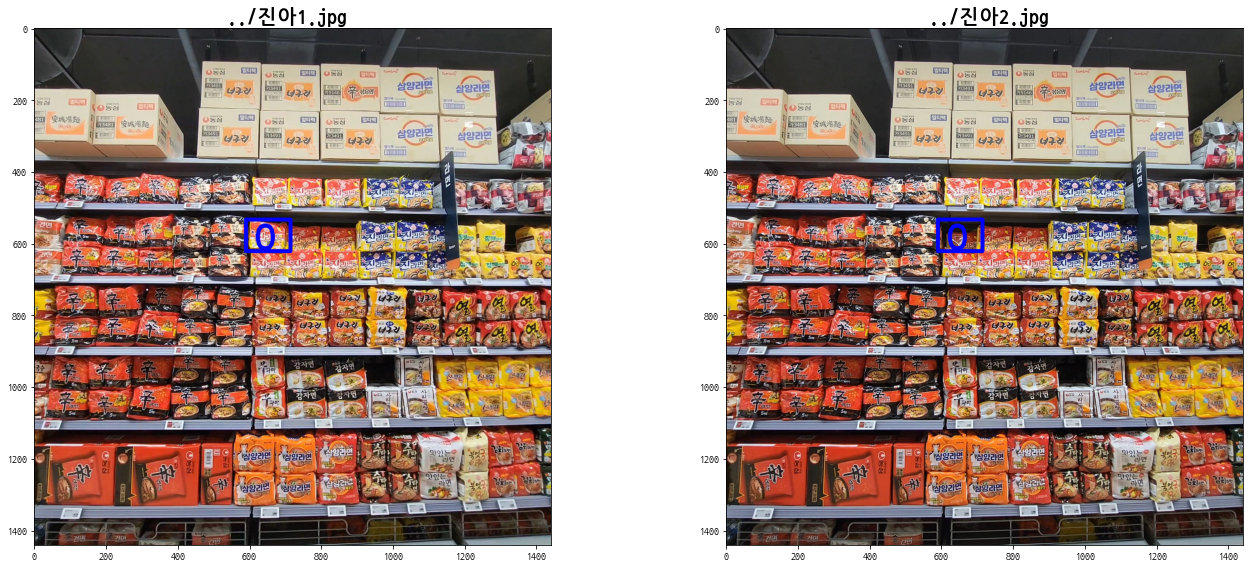

In [10]:
plot_diff('../진아1.jpg', '../진아2.jpg', [(590, 533, 124, 88)])